## Observations and Insights 

Three Observations:

1. The first observation I can draw from the data is that there is an almost even number of male and female mice. This is very important for a procedure like this because we want to control as many parts of the experiment as we can to produce the most accurate and consistent results.

2. The second observation I can draw is that there aren't that many outliers in the final volume, according to the box plot. This could mean that the data is really accurate and that one outlier could have just been a rare anomaly. Although we cannot ignore that outlier, seeing that there aren't any others, can give the data a bit more clarity. 

3. One inference that I can make is that as the weight of the mice increase, the higher the tumor volume will be. I think this prediction is fairly accurate because judging by the scatter plot and the upwards trend of the regression line, we can see that the volume only incraeses as the weight increases.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_dataset = pd.merge(mouse_metadata, study_results, on= "Mouse ID")

# Display the data table for preview
merged_dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
numberOfMice = len(merged_dataset["Mouse ID"].value_counts())
print("The number of mice is " + str(numberOfMice))

The number of mice is 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_dataset.loc[merged_dataset.duplicated(), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
set_new_index = merged_dataset.set_index("Mouse ID")
new_dataset = set_new_index.drop(index = "g989")
new_dataset_fixed = new_dataset.reset_index()
new_dataset_fixed

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(new_dataset_fixed["Mouse ID"].value_counts()))

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = new_dataset_fixed.groupby("Drug Regimen")
meanSummary = summary["Tumor Volume (mm3)"].mean()
medianSummary = summary["Tumor Volume (mm3)"].median()
varianceSummary = summary["Tumor Volume (mm3)"].var()
stdevSummary = summary["Tumor Volume (mm3)"].std()
semSummary = summary["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summaryResults = pd.DataFrame({"Mean" : meanSummary,"Median":medianSummary,"Variance":varianceSummary,"Standard Deviation":stdevSummary,"SEM":semSummary})
summaryResults

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summaryResults = pd.DataFrame

# This method produces everything in a single groupby function
summary2 = new_dataset_fixed.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

## Bar and Pie Charts

Text(0.5, 1.0, 'Total Number of Mice')

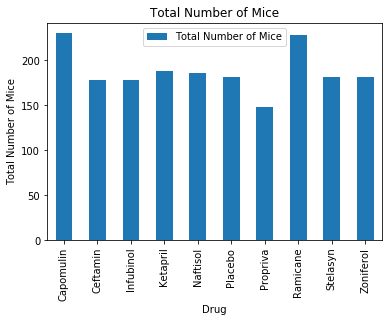

In [9]:
#finding data for each treatment
countsPerTreatment = summary["Mouse ID"].count()

t1 = countsPerTreatment["Capomulin"]
t2 = countsPerTreatment["Ceftamin"]
t3 = countsPerTreatment["Infubinol"]
t4 = countsPerTreatment["Ketapril"]
t5 = countsPerTreatment["Naftisol"]
t6 = countsPerTreatment["Placebo"]
t7 = countsPerTreatment["Propriva"]
t8 = countsPerTreatment["Ramicane"]
t9 = countsPerTreatment["Stelasyn"]
t10 = countsPerTreatment["Zoniferol"]
countsPerTreatment

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
treatmentData = pd.DataFrame({'Drug':['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'],'Total Number of Mice':[t1,t2,t3,t4,t5,t6,t7,t8,t9,t10]})
bar1 = treatmentData.plot.bar(x = 'Drug', y = 'Total Number of Mice', rot=90)
bar1.set_ylabel("Total Number of Mice")
bar1.set_title("Total Number of Mice")

Text(0.5, 1.0, 'Total Number of Mice')

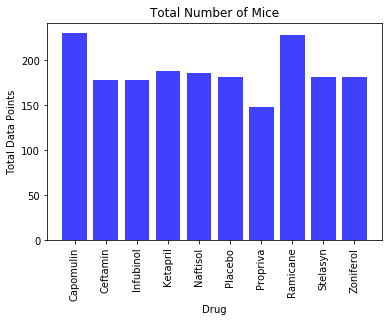

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(treatmentData["Drug"], treatmentData["Total Number of Mice"], color = 'b',alpha = 0.75, align="center")
plt.xlabel("Drug")
plt.ylabel("Total Data Points")
plt.xticks(rotation=90)
plt.title("Total Number of Mice")

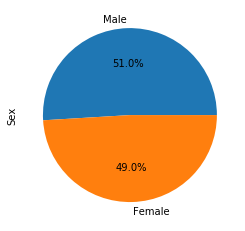

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genderGroup = new_dataset_fixed.groupby("Sex")
genderCount = genderGroup["Mouse ID"].count()

genderData = [genderCount["Male"],genderCount["Female"]]

pieChart = pd.Series(genderData, index = ("Male","Female"))
pieChart.plot.pie(label = "Sex", autopct ="%1.1f%%" )

Text(0.5, 0, 'Sex')

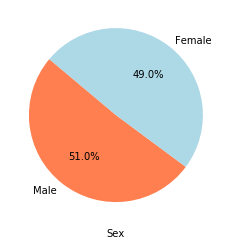

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
sizes = [genderCount["Male"],genderCount["Female"]]
colors = ["coral","lightblue"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
plt.xlabel("Sex")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#splitting the data into four treatment regimens via .isin
treatmentRegs = ["Capomulin", "Ramicane","Infubinol", "Ceftamin"]
data_treatmentRegs = new_dataset_fixed[new_dataset_fixed["Drug Regimen"].isin(treatmentRegs)]
finalTimepoint = data_treatmentRegs.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].last()
finalTimepoint

#calculate final volume using .last()
fv = data_treatmentRegs.groupby(["Drug Regimen","Mouse ID"])["Tumor Volume (mm3)"].last()
fv

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(fv, new_dataset_fixed,on = "Mouse ID")
fv

Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
                            ...    
Ramicane      s508        30.276232
              u196        40.667713
              w678        43.166373
              y449        44.183451
              z578        30.638696
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 

#empty list for plotting 
plot = []    
for treatment in treatmentRegs:
    
    #appending values for plot in the for loop
    plot.append(fv[treatment])
    
    quartiles = fv[treatment].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #printing data in an organized and readable format
    print("___________________________________________________________")
    print(f"This is data for {treatment}.")
    print(f"The lower quartile for is: {lowerq}")
    print(f"The upper quartile for is: {upperq}")
    print(f"The interquartile range is: {iqr}")
    print(f"The the median is: {quartiles[0.5]} ")
    print(f"Values that are below {lower_bound} could be outliers.")
    print(f"Values that are above {upper_bound} could be outliers.")

___________________________________________________________
This is data for Capomulin.
The lower quartile for is: 32.37735684
The upper quartile for is: 40.1592203
The interquartile range is: 7.781863460000004
The the median is: 38.125164399999996 
Values that are below 20.70456164999999 could be outliers.
Values that are above 51.83201549 could be outliers.
___________________________________________________________
This is data for Ramicane.
The lower quartile for is: 31.56046955
The upper quartile for is: 40.65900627
The interquartile range is: 9.098536719999998
The the median is: 36.56165229 
Values that are below 17.912664470000003 could be outliers.
Values that are above 54.30681135 could be outliers.
___________________________________________________________
This is data for Infubinol.
The lower quartile for is: 54.04860769
The upper quartile for is: 65.52574285
The interquartile range is: 11.477135160000003
The the median is: 60.16518046 
Values that are below 36.832904949999

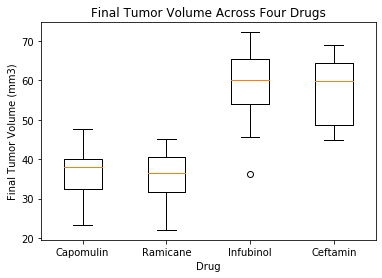

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.boxplot(plot, labels = treatmentRegs)
ax.set_title("Final Tumor Volume Across Four Drugs")
ax.set_xlabel("Drug")
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Change in Tumor Volume for Mouse l509 When Treated with Capomulin')

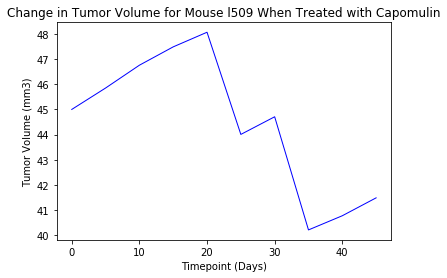

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
linePlotData = new_dataset_fixed.loc[new_dataset_fixed["Mouse ID"] =="l509"] 

plt.plot(linePlotData["Timepoint"],linePlotData["Tumor Volume (mm3)"],color = "blue",linewidth = 1, label = "Capomulin")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Change in Tumor Volume for Mouse l509 When Treated with Capomulin")

Text(0.5, 1.0, 'The Avg Weight Versus The Avg Tumor Volume')

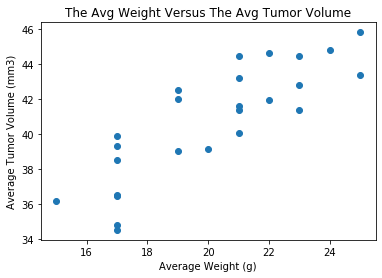

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatterPlotData = new_dataset_fixed.loc[new_dataset_fixed["Drug Regimen"] == "Capomulin"]
grouped_scatter = scatterPlotData.groupby(["Mouse ID"])

#calculating average mean and tumor volume
weightAvg = grouped_scatter["Weight (g)"].mean()
capAvg = grouped_scatter["Tumor Volume (mm3)"].mean()

#generating scatter plot
plt.scatter(weightAvg, capAvg)
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("The Avg Weight Versus The Avg Tumor Volume")

## Correlation and Regression

The equation for the regression line is: y = 0.95x + 21.55
The correlation between average weight and average tumor volume is 0.8419363424694717


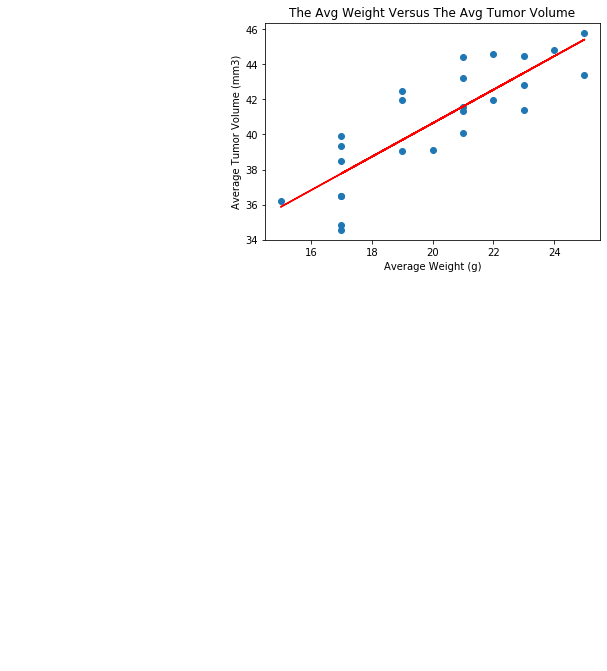

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = weightAvg
y_values = capAvg
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

#plotting regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equation,(6,10),fontsize=15,color="red")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("The Avg Weight Versus The Avg Tumor Volume")

print("The equation for the regression line is: " + str(line_equation))
corr = st.pearsonr(weightAvg,capAvg)
print("The correlation between average weight and average tumor volume is " + str(corr[0]))

plt.show()